<a href="https://colab.research.google.com/github/RummanAli/FYP2022-KnowledgeVision/blob/main/Dermnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip drive/MyDrive/DermNet/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

In [3]:
import numpy as np
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
import numpy as np
import keras
import tensorflow
class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels,knowledge, batch_size=100, dim=(224,224), n_channels=3,
                 n_classes=23, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.knowledge = knowledge
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        k = np.empty((self.batch_size,23), dtype=int)
        y = np.empty((self.batch_size), dtype=int)
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            img = Image.open(ID)
            img2 = tf.keras.preprocessing.image.smart_resize(np.array(img),(224,224))
            X[i,] = img2
            k[i] = self.knowledge[ID]
            y[i] = self.labels[ID]
            
        return [X,k], tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'
img_list = os.listdir(train_dir)
img_list.sort()
list_IDs = []
labels = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(train_dir,path)):
        final = os.path.join(train_dir,path,img)
        list_IDs.append(final)
        labels[final] = i

        
img_list = os.listdir(test_dir)
img_list.sort()
list_IDs2 = []
labels2 = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(test_dir,path)):
        final = os.path.join(test_dir,path,img)
        list_IDs2.append(final)
        labels2[final] = i

In [ ]:
train_generator = DataGenerator(list_IDs, labels)
validation_generator = DataGenerator(list_IDs2, labels2)

In [ ]:
!unzip drive/MyDrive/DermNet/base_model.zip
!unzip drive/MyDrive/DermNet/base_model_dense.zip
!unzip drive/MyDrive/DermNet/base_model_NASNET.zip

Archive:  drive/MyDrive/DermNet/base_model.zip
   creating: dermDNNRES152/
   creating: dermDNNRES152/variables/
  inflating: dermDNNRES152/variables/variables.index  
  inflating: dermDNNRES152/variables/variables.data-00000-of-00001  
   creating: dermDNNRES152/assets/
  inflating: dermDNNRES152/saved_model.pb  
  inflating: dermDNNRES152/keras_metadata.pb  
Archive:  drive/MyDrive/DermNet/base_model_dense.zip
   creating: dermDNNdense169/
  inflating: dermDNNdense169/saved_model.pb  
   creating: dermDNNdense169/variables/
  inflating: dermDNNdense169/variables/variables.index  
  inflating: dermDNNdense169/variables/variables.data-00000-of-00001  
   creating: dermDNNdense169/assets/
  inflating: dermDNNdense169/keras_metadata.pb  
Archive:  drive/MyDrive/DermNet/base_model_NASNET.zip
   creating: dermDNNNASNET/
  inflating: dermDNNNASNET/saved_model.pb  
   creating: dermDNNNASNET/variables/
  inflating: dermDNNNASNET/variables/variables.index  
  inflating: dermDNNNASNET/variable

In [ ]:
resnet = tf.keras.models.load_model('dermDNNRES152')
densenet = tf.keras.models.load_model('dermDNNdense169')
nasnet = tf.keras.models.load_model('dermDNNNASNET')

In [ ]:
preds_res_train = []
preds_dense_train = []
preds_nas_train = []
IDs_train = []
labels_train = []

In [ ]:
for x,x2,id,label in train_generator:
  preds = resnet(x)
  [preds_res_train.append(pred) for pred in preds]
  preds = densenet(x)
  [preds_dense_train.append(pred) for pred in preds]
  [labels_train.append(lab) for lab in label]
  preds = nasnet(x2)
  [preds_nas_train.append(pred) for pred in preds]
  [IDs_train.append(X_id) for X_id in id]

In [ ]:
final_train = np.empty((4000,23))
for i in range(4000):
  final_train[i,] = (preds_res_train[i] + preds_dense_train[i] + preds_nas_train[i])/3

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(preds_res_train,axis = -1),labels_train))
print(classification_report(np.argmax(preds_dense_train,axis = -1),labels_train))
print(classification_report(np.argmax(preds_nas_train,axis = -1),labels_train))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       864
           1       0.99      0.92      0.95      1232
           2       0.91      0.98      0.95       452
           3       0.99      0.98      0.99       451
           4       0.97      0.97      0.97       285
           5       0.98      0.91      0.94      1330
           6       0.98      0.85      0.91       465
           7       0.79      0.89      0.84       211
           8       0.83      0.91      0.87       367
           9       0.97      0.95      0.96       584
          10       0.99      0.96      0.97       429
          11       0.99      0.80      0.89       572
          12       0.92      0.92      0.92      1041
          13       1.00      0.99      0.99       262
          14       0.88      0.97      0.92      1277
          15       0.94      0.99      0.96       409
          16       0.87      0.99      0.93      1196
          17       0.99    

In [ ]:
def pre_trained_model():
    inputA = Input((224,224,3))
    inputA = data_augmentation(inputA)
    c1l1  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(inputA)
    c1l2  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(c1l1)
    ces2  = Add()([c1l2, c1l1])
    c1l3  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(ces2)
    ces3  = Add()([c1l3, ces2])
    ces3  = Flatten()(ces3)
    ces3  = Dense(23)(ces3)
    ces3  = Activation('softmax')(ces3)
    return Model(inputs=inputA, outputs=ces3)

In [ ]:
pretrained_model = pre_trained_model()
pretrained_model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
history = pretrained_model.fit_generator(train_generator,validation_data = validation_generator,epochs = 20)
tf.keras.models.save_model(pretrained_model,'drive/MyDrive/DermNet/dermPreTrained')

In [ ]:
IDs_train = np.load('/content/drive/MyDrive/DermNet/IDs_train.npy')
IDs_test = np.load('/content/drive/MyDrive/DermNet/IDs_test.npy')
knowledge_test = np.load('/content/drive/MyDrive/DermNet/knowledge_test.npy')
knowledge_train = np.load('/content/drive/MyDrive/DermNet/knowledge_train.npy')
preds_res_test = np.load('/content/drive/MyDrive/DermNet/preds_res_test.npy')
preds_res_train = np.load('/content/drive/MyDrive/DermNet/preds_res_train.npy')
preds_dense_test = np.load('/content/drive/MyDrive/DermNet/preds_dense_test.npy')
preds_dense_train = np.load('/content/drive/MyDrive/DermNet/preds_dense_train.npy')
preds_nas_test = np.load('/content/drive/MyDrive/DermNet/preds_nas_test.npy')
preds_nas_train = np.load('/content/drive/MyDrive/DermNet/preds_nas_train.npy')

In [ ]:
final_train = np.empty((15500,23))
final_test = np.empty((4000,23))
for i in range(15500):
  final_train[i,] = (preds_res_train[i] + preds_dense_train[i] + preds_nas_train[i])
for i in range(4000):
  final_test[i,] = (preds_res_test[i] + preds_dense_test[i] + preds_nas_test[i])

In [ ]:
final_train[0]

array([3.18563525e-06, 3.63857180e-05, 1.47147330e-05, 1.39530588e-04,
       1.36369117e-05, 1.98109308e-03, 2.87214220e-06, 7.13126035e-04,
       4.87527495e-06, 1.79878771e-04, 7.77024450e-03, 7.32792316e-08,
       3.31176003e-03, 1.34058020e-04, 9.72482920e-01, 4.37444396e-05,
       1.94464356e-03, 5.83535402e-05, 9.56221763e-03, 6.80190837e-08,
       2.88945303e-05, 1.45235320e-03, 1.21400713e-04])

In [ ]:
final1 = {}
final2 = {}
for id,knowledge in zip(IDs_train,final_train):
  final1[id] = knowledge
for id,knowledge in zip(IDs_test,final_test):
  final2[id] = knowledge

In [ ]:
labels_calc = []
know_finals
for id in IDs_train:
  labels_calc.append(labels[id])

In [ ]:
len(final1)

15500

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(final_train,axis = -1),labels_calc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       835
           1       1.00      0.97      0.98      1178
           2       0.99      0.97      0.98       495
           3       0.99      1.00      0.99       443
           4       0.99      0.99      0.99       284
           5       0.99      0.97      0.98      1249
           6       0.97      0.97      0.97       403
           7       0.89      0.85      0.87       252
           8       0.85      0.92      0.88       375
           9       0.98      0.97      0.98       573
          10       0.99      0.99      0.99       416
          11       0.99      0.91      0.95       502
          12       0.91      0.93      0.92      1011
          13       1.00      1.00      1.00       261
          14       0.94      0.96      0.95      1364
          15       1.00      1.00      1.00       429
          16       0.95      0.99      0.97      1303
          17       0.99    

In [ ]:
len(final1)

15500

In [ ]:
train_generator = DataGenerator(IDs_train,labels,final1)
validation_generator = DataGenerator(IDs_test, labels2,final2)

In [ ]:
def knowledge_incorporated_model(pretrained_model):    
    inputA = Input((224,224,3))
    inputB = Input((23))
    l1    = pretrained_model(inputA)
    l1    = Add()([l1,inputB])
    l1    = Dense(128)(l1)
    l2    = Activation('relu')(l1)
    l2    = Dense(23)(l2)
    l2    = Activation('softmax')(l2)
    l3    = Add()([l2,inputB])
    l4    = Dense(128)(l3)
    l5    = Activation('relu')(l4)
    l6    = Dense(23)(l5)
    l7    = Activation('softmax')(l6)
    l8    = Add()([l7,inputB])
    l9    = Dense(23)(l8)
    l9    = Activation('softmax')(l9)
    return Model(inputs=[inputA, inputB], outputs=l9)

In [ ]:
opt_adam = tf.keras.optimizers.Adam(
    learning_rate=0.0010,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

In [ ]:
!unzip drive/MyDrive/DermNet/dermPreTrained.zip

Archive:  drive/MyDrive/DermNet/dermPreTrained.zip


In [ ]:
model_pre = tf.keras.models.load_model('drive/MyDrive/DermNet/dermPreTrained')

In [ ]:
model_DNN_knowledge = knowledge_incorporated_model(model_pre)
tf.keras.models.save_model(model_DNN_knowledge,'/content/drive/MyDrive/DermNet/dermDNN_knowledge')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DermNet/dermDNN_knowledge/assets


In [ ]:
#knowledge as arthemtic mean
model_DNN_knowledge = knowledge_incorporated_model(model_pre)
model_DNN_knowledge.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 20,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/drive/MyDrive/DermNet/dermDNN_knowledge')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
155/155 - 349s - loss: 3.1313 - accuracy: 0.0476 - val_loss: 3.1247 - val_accuracy: 0.0880 - 349s/epoch - 2s/step
Epoch 2/20
155/155 - 309s - loss: 3.1177 - accuracy: 0.0903 - val_loss: 3.1112 - val_accuracy: 0.0880 - 309s/epoch - 2s/step
Epoch 3/20
155/155 - 306s - loss: 3.1031 - accuracy: 0.0903 - val_loss: 3.0967 - val_accuracy: 0.0880 - 306s/epoch - 2s/step
Epoch 4/20
155/155 - 305s - loss: 3.0847 - accuracy: 0.1681 - val_loss: 3.0797 - val_accuracy: 0.0890 - 305s/epoch - 2s/step
Epoch 5/20
155/155 - 305s - loss: 3.0595 - accuracy: 0.1635 - val_loss: 3.0623 - val_accuracy: 0.0715 - 305s/epoch - 2s/step
Epoch 6/20
155/155 - 306s - loss: 3.0209 - accuracy: 0.1407 - val_loss: 3.0449 - val_accuracy: 0.0720 - 306s/epoch - 2s/step
Epoch 7/20
155/155 - 307s - loss: 2.9761 - accuracy: 0.1528 - val_loss: 3.0352 - val_accuracy: 0.0828 - 307s/epoch - 2s/step
Epoch 8/20
155/155 - 305s - loss: 2.9378 - accuracy: 0.1586 - val_loss: 3.0293 - val_accuracy: 0.0887 - 305s/epoch - 2s/step


In [ ]:
#weighted knowledge
model_DNN_knowledge = knowledge_incorporated_model(model_pre)
model_DNN_knowledge.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 20,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/drive/MyDrive/DermNet/dermDNN_knowledge')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
155/155 - 361s - loss: 3.0006 - accuracy: 0.0843 - val_loss: 3.0697 - val_accuracy: 0.0707 - 361s/epoch - 2s/step
Epoch 2/20
155/155 - 306s - loss: 2.9297 - accuracy: 0.2005 - val_loss: 3.0307 - val_accuracy: 0.1082 - 306s/epoch - 2s/step
Epoch 3/20
155/155 - 303s - loss: 2.8475 - accuracy: 0.2809 - val_loss: 2.9837 - val_accuracy: 0.1562 - 303s/epoch - 2s/step
Epoch 4/20
155/155 - 303s - loss: 2.7353 - accuracy: 0.3708 - val_loss: 2.9239 - val_accuracy: 0.1992 - 303s/epoch - 2s/step
Epoch 5/20
155/155 - 305s - loss: 2.6023 - accuracy: 0.4397 - val_loss: 2.8610 - val_accuracy: 0.2278 - 305s/epoch - 2s/step
Epoch 6/20
155/155 - 304s - loss: 2.4874 - accuracy: 0.5090 - val_loss: 2.8098 - val_accuracy: 0.3485 - 304s/epoch - 2s/step
Epoch 7/20
155/155 - 303s - loss: 2.3918 - accuracy: 0.5972 - val_loss: 2.7662 - val_accuracy: 0.3600 - 303s/epoch - 2s/step
Epoch 8/20
155/155 - 305s - loss: 2.3072 - accuracy: 0.6592 - val_loss: 2.7287 - val_accuracy: 0.4150 - 305s/epoch - 2s/step


In [ ]:
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 20,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/drive/MyDrive/DermNet/dermDNN_knowledge')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
155/155 - 316s - loss: 1.5657 - accuracy: 0.8611 - val_loss: 2.4005 - val_accuracy: 0.4593 - 316s/epoch - 2s/step
Epoch 2/20
155/155 - 312s - loss: 1.5210 - accuracy: 0.8613 - val_loss: 2.3828 - val_accuracy: 0.4590 - 312s/epoch - 2s/step
Epoch 3/20
155/155 - 306s - loss: 1.4777 - accuracy: 0.8652 - val_loss: 2.3657 - val_accuracy: 0.4585 - 306s/epoch - 2s/step
Epoch 4/20
155/155 - 308s - loss: 1.4356 - accuracy: 0.8657 - val_loss: 2.3490 - val_accuracy: 0.4613 - 308s/epoch - 2s/step
Epoch 5/20
155/155 - 304s - loss: 1.3948 - accuracy: 0.8654 - val_loss: 2.3324 - val_accuracy: 0.4635 - 304s/epoch - 2s/step
Epoch 6/20
155/155 - 305s - loss: 1.3553 - accuracy: 0.8716 - val_loss: 2.3171 - val_accuracy: 0.4672 - 305s/epoch - 2s/step
Epoch 7/20
155/155 - 309s - loss: 1.3169 - accuracy: 0.8735 - val_loss: 2.3027 - val_accuracy: 0.4678 - 309s/epoch - 2s/step
Epoch 8/20
155/155 - 310s - loss: 1.2797 - accuracy: 0.8737 - val_loss: 2.2889 - val_accuracy: 0.4680 - 310s/epoch - 2s/step


In [ ]:
model_DNN_knowledge == tf.keras.models.load_model('/drive/MyDrive/DermNet/dermDNN_knowledge')
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 20,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/drive/MyDrive/DermNet/dermDNN_knowledge')#/content/drive/MyDrive/DermNet/dermPreTrained

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
155/155 - 306s - loss: 0.8895 - accuracy: 0.8848 - val_loss: 2.1608 - val_accuracy: 0.4807 - 306s/epoch - 2s/step
Epoch 2/20
155/155 - 305s - loss: 0.8656 - accuracy: 0.9021 - val_loss: 2.1543 - val_accuracy: 0.4845 - 305s/epoch - 2s/step
Epoch 3/20
155/155 - 305s - loss: 0.8425 - accuracy: 0.9081 - val_loss: 2.1481 - val_accuracy: 0.4843 - 305s/epoch - 2s/step
Epoch 4/20
155/155 - 304s - loss: 0.8201 - accuracy: 0.9079 - val_loss: 2.1420 - val_accuracy: 0.4845 - 304s/epoch - 2s/step
Epoch 5/20


# Saving Knowledge Densenet

In [8]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
import pickle
model_ft = models.densenet169(pretrained=False)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 23)
input_size = 224
model_ft.load_state_dict(torch.load('/content/drive/MyDrive/DermNet/Densenet/torch_densenet_best.pth'))
model_ft.eval()
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

k1 = {}
train_dir = '/content/train'

img_list = os.listdir(train_dir)
img_list.sort()
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(train_dir,path)):
        final = os.path.join(train_dir,path,img)
        img = Image.open(final)
        img = data_transforms['train'](img)
        img = torch.unsqueeze(img,axis = 0)
        img = img.to(device)
        output = model_ft(img)
        k1[final] = output.detach().cpu().numpy()

an_file = open("/content/drive/MyDrive/DermNet/Densenet/train_outputs_densenet_best.pkl", "wb")
pickle.dump(k1, an_file)
an_file.close()

k2 = {}
test_dir = '/content/test'

img_list = os.listdir(test_dir)
img_list.sort()
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(test_dir,path)):
        final = os.path.join(test_dir,path,img)
        img = Image.open(final)
        img = data_transforms['test'](img)
        img = torch.unsqueeze(img,axis = 0)
        img = img.to(device)
        output = model_ft(img)
        k2[final] = output.detach().cpu().numpy()

an_file = open("/content/drive/MyDrive/DermNet/Densenet/test_outputs_densenet_best.pkl", "wb")
pickle.dump(k2, an_file)
an_file.close()


In [9]:
import os
import pickle
import numpy as np
labels = []
train_res = []
train_dense = []
img_list = os.listdir('/content/train')
img_list.sort()
a_file = open("/content/drive/MyDrive/DermNet/Resnet_teacher/train_outputs_resnet_best.pkl","rb")
final = pickle.load(a_file)
an_file = open("/content/drive/MyDrive/DermNet/Densenet/train_outputs_densenet_best.pkl","rb")
final2 = pickle.load(an_file)
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join('/content/train',path)):
        labels.append(i)
        train_res.append(final[os.path.join('/content/train/',path,img)])
        train_dense.append(final2[os.path.join('/content/train/',path,img)])
from sklearn.metrics import classification_report
print(classification_report(np.argmax(train_res,axis = -1),labels))
print(classification_report(np.argmax(train_dense,axis = -1),labels))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       846
           1       0.91      0.93      0.92      1117
           2       0.88      0.86      0.87       504
           3       0.85      0.94      0.89       403
           4       0.93      0.88      0.90       306
           5       0.92      0.87      0.90      1294
           6       0.95      0.79      0.86       486
           7       0.86      0.75      0.80       276
           8       0.90      0.77      0.83       471
           9       0.94      0.79      0.86       672
          10       0.71      0.94      0.81       318
          11       0.86      0.95      0.90       415
          12       0.88      0.87      0.87      1050
          13       0.82      0.94      0.88       228
          14       0.91      0.84      0.87      1515
          15       0.81      0.92      0.86       379
          16       0.93      0.88      0.91      1438
          17       0.92    

In [24]:
import os
import pickle
import numpy as np
labels = []
train_res = []
train_dense = []
preds_res = []
preds_dense = [] 
img_list = os.listdir('/content/test')
img_list.sort()
a_file = open("/content/drive/MyDrive/DermNet/Resnet_teacher/test_outputs_resnet_best.pkl","rb")
final = pickle.load(a_file)
an_file = open("/content/drive/MyDrive/DermNet/Densenet/test_outputs_densenet_best.pkl","rb")
final2 = pickle.load(an_file)
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join('/content/test',path)):
        labels.append(i)
        preds_res.append(final[os.path.join('/content/test/',path,img)])
        preds_dense.append(final2[os.path.join('/content/test/',path,img)])
from sklearn.metrics import classification_report
report = classification_report(np.argmax(preds_res,axis = -1),labels,output_dict = True)
report2 = classification_report(np.argmax(preds_dense,axis = -1),labels,output_dict = True)
df = pandas.DataFrame(report).transpose() 
df2 = pandas.DataFrame(report2).transpose()  
df.to_csv('drive/MyDrive/DermNet/resnet.csv')
df2.to_csv('drive/MyDrive/DermNet/densenet.csv')  

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       331
           1       0.70      0.77      0.73       261
           2       0.64      0.68      0.66       116
           3       0.44      0.63      0.52        79
           4       0.48      0.52      0.50        67
           5       0.66      0.71      0.68       284
           6       0.52      0.61      0.56        87
           7       0.68      0.53      0.60        77
           8       0.58      0.50      0.54       118
           9       0.63      0.52      0.57       172
          10       0.63      0.54      0.58       123
          11       0.80      0.77      0.78       121
          12       0.79      0.78      0.79       265
          13       0.58      0.54      0.56        71
          14       0.67      0.62      0.65       379
          15       0.55      0.54      0.54       109
          16       0.73      0.77      0.75       324
          17       0.62    

In [1]:
import numpy as np
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
import numpy as np
import keras
import tensorflow
class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels,knowledge_res,knowledge_dense, batch_size=100, dim=(224,224), n_channels=3,
                 n_classes=23, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.knowledge_res = knowledge_res
        self.knowledge_dense = knowledge_dense
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        k_res = np.empty((self.batch_size,23), dtype=float)
        k_dense = np.empty((self.batch_size,23), dtype=float)
        y = np.empty((self.batch_size), dtype=int)
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample

            k_res[i] = self.knowledge_res[ID]
            k_dense[i] = self.knowledge_dense[ID]
            y[i] = self.labels[ID]
            
        return [k_dense,k_res], tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [19]:
train_dir = '/content/train'
test_dir = '/content/test'
img_list = os.listdir(train_dir)
img_list.sort()
list_IDs = []
labels = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(train_dir,path)):
        final = os.path.join(train_dir,path,img)
        list_IDs.append(final)
        labels[final] = i

        
img_list = os.listdir(test_dir)
img_list.sort()
list_IDs2 = []
labels2 = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(test_dir,path)):
        final = os.path.join(test_dir,path,img)
        list_IDs2.append(final)
        labels2[final] = i

In [20]:
train_res = open("/content/drive/MyDrive/DermNet/Resnet_teacher/train_outputs_resnet_best.pkl","rb")
test_res = open("/content/drive/MyDrive/DermNet/Resnet_teacher/test_outputs_resnet_best.pkl","rb")
train_dense = open("/content/drive/MyDrive/DermNet/Densenet/train_outputs_densenet_best.pkl","rb")
test_dense = open("/content/drive/MyDrive/DermNet/Densenet/test_outputs_densenet_best.pkl","rb")
train_res_dict = pickle.load(train_res)
test_res_dict = pickle.load(test_res)
train_dense_dict = pickle.load(train_dense)
test_dense_dict = pickle.load(test_dense)

train_generator = DataGenerator(list_IDs, labels,train_res_dict,train_dense_dict)
validation_generator = DataGenerator(list_IDs2, labels2,test_res_dict,test_dense_dict)

In [28]:
def knowledge_incorporated_model():#pretrained_model):    
    inputA = Input((23))
    inputB = Input((23))
    l1    = Add()([inputA,inputB])
    l1    = Dense(32)(l1)
    l2    = Activation('relu')(l1)
    l4    = Dense(64)(l2)
    l5    = Activation('relu')(l4)
    l6    = Dense(23)(l5)
    l8    = Add()([l6,inputB])
    l9    = Activation('softmax')(l8)
    return Model(inputs=[inputA, inputB], outputs=l9)

In [29]:
opt_adam = tf.keras.optimizers.Adam(
    learning_rate=0.0010,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

In [30]:
model_DNN_knowledge = knowledge_incorporated_model()
model_DNN_knowledge.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 100,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/content/drive/MyDrive/DermNet/knowledge_model_logits')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


155/155 - 1s - loss: 0.3922 - accuracy: 0.8775 - val_loss: 1.7472 - val_accuracy: 0.6913 - 1s/epoch - 8ms/step
Epoch 2/100
155/155 - 1s - loss: 0.2466 - accuracy: 0.9185 - val_loss: 1.8352 - val_accuracy: 0.6940 - 618ms/epoch - 4ms/step
Epoch 3/100
155/155 - 1s - loss: 0.2079 - accuracy: 0.9286 - val_loss: 1.9339 - val_accuracy: 0.6967 - 620ms/epoch - 4ms/step
Epoch 4/100
155/155 - 1s - loss: 0.1845 - accuracy: 0.9359 - val_loss: 1.9914 - val_accuracy: 0.7017 - 631ms/epoch - 4ms/step
Epoch 5/100
155/155 - 1s - loss: 0.1660 - accuracy: 0.9425 - val_loss: 2.0744 - val_accuracy: 0.7053 - 667ms/epoch - 4ms/step
Epoch 6/100
155/155 - 1s - loss: 0.1543 - accuracy: 0.9440 - val_loss: 2.1362 - val_accuracy: 0.7072 - 663ms/epoch - 4ms/step
Epoch 7/100
155/155 - 1s - loss: 0.1435 - accuracy: 0.9485 - val_loss: 2.2120 - val_accuracy: 0.7048 - 643ms/epoch - 4ms/step
Epoch 8/100
155/155 - 1s - loss: 0.1361 - accuracy: 0.9492 - val_loss: 2.2175 - val_accuracy: 0.7088 - 646ms/epoch - 4ms/step
Epoch 9

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DermNet/knowledge_model_logits/assets


In [21]:
from sklearn.metrics import classification_report
import pickle
model_softmax = tf.keras.models.load_model("/content/drive/MyDrive/DermNet/knowledge_model")
model_logits = tf.keras.models.load_model("/content/drive/MyDrive/DermNet/knowledge_model_logits")
labels = []
preds_soft = []
preds_logit = [] 
test_dir = '/content/test'
img_list = os.listdir(test_dir)
img_list.sort()
a_file = open("/content/drive/MyDrive/DermNet/Resnet_teacher/test_outputs_resnet_best.pkl","rb")
final = pickle.load(a_file)
an_file = open("/content/drive/MyDrive/DermNet/Densenet/test_outputs_densenet_best.pkl","rb")
final2 = pickle.load(an_file)
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(test_dir,path)):
        labels.append(i)
        know_res = final[os.path.join(test_dir,path,img)]
        know_dense = final2[os.path.join(test_dir,path,img)]
        preds_soft.append(model_softmax([know_dense,know_res]))
        preds_logit.append(model_logits([know_dense,know_res]))

report = classification_report(np.argmax(preds_soft,axis = -1),labels,output_dict=True)
report2 = classification_report(np.argmax(preds_logit,axis = -1),labels,output_dict=True)

In [23]:
import pandas
df = pandas.DataFrame(report2).transpose()  
df.to_csv('drive/MyDrive/DermNet/results.csv')  

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle
import os
import tensorflow as tf
import numpy as np
model_list = ['knowledge_model_logits']
lab = ['knowledge_Incorporated_Model']
plt.figure(0).clf()

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100

a_file = open("/content/drive/MyDrive/DermNet/Resnet_teacher/test_outputs_resnet_best.pkl","rb")
final = pickle.load(a_file)
an_file = open("/content/drive/MyDrive/DermNet/Densenet/test_outputs_densenet_best.pkl","rb")
final2 = pickle.load(an_file)

test_dir = '/content/test'
img_list = os.listdir(test_dir)
img_list.sort()


model = tf.keras.models.load_model('/content/drive/MyDrive/DermNet/'+model_list[0])
y_true = []
outputs = []
know = []
know2 = []


for i,path in enumerate(img_list):
  for img in os.listdir(os.path.join(test_dir,path)):
      y_true.append(i)
      know_res = final[os.path.join(test_dir,path,img)]
      know_dense = final2[os.path.join(test_dir,path,img)]
      outputs.append(model([know_dense,know_res]))
#fpr, tpr, _ = metrics.roc_curve(y_true, outputs)
#auc = round(metrics.roc_auc_score(y_true, outputs), 4)
#plt.plot(fpr,tpr,label=lab[0]+", AUC="+str(auc),color='black',linewidth=3)


for i,path in enumerate(img_list):
  for img in os.listdir(os.path.join(test_dir,path)):
      know_res = final[os.path.join(test_dir,path,img)]
      know_dense = final2[os.path.join(test_dir,path,img)]
      know.append(know_res)
      know2.append(know_dense)

#fpr, tpr, _ = metrics.roc_curve(y_true, np.argmax(know,axis = -1))
#auc = round(metrics.roc_auc_score(y_true, np.argmax(know,axis = -1)), 4)
#plt.plot(fpr,tpr,label="Resnet-152"+", AUC="+str(auc),color='red')  
#fpr, tpr, _ = metrics.roc_curve(y_true, np.argmax(know2,axis = -1))
#auc = round(metrics.roc_auc_score(y_true, np.argmax(know2,axis = -1)), 4)
#plt.plot(fpr,tpr,label="Densenet-169"+", AUC="+str(auc)) 

#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')
#plt.legend(loc= "best")

<Figure size 700x500 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y_true, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
n_classes = y.shape[1]

y_score = np.reshape(np.array(outputs),(4002,23))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [17]:
y = label_binarize(y_true, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
n_classes = y.shape[1]

y_score = np.reshape(np.array(know),(4002,23))

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"]) 

In [18]:
y = label_binarize(y_true, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
n_classes = y.shape[1]

y_score = np.reshape(np.array(know2),(4002,23))

# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Compute micro-average ROC curve and ROC area
fpr3["micro"], tpr3["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

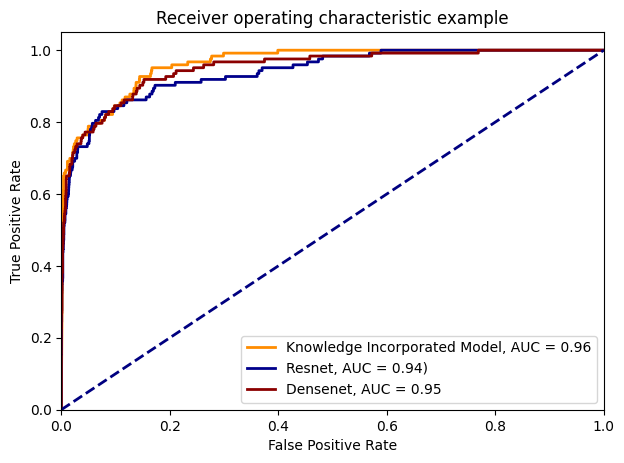

In [19]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="Knowledge Incorporated Model, AUC = %0.2f" % roc_auc[2],
)
plt.plot(
    fpr2[2],
    tpr2[2],
    color="darkblue",
    lw=lw,
    label="Resnet, AUC = %0.2f)" % roc_auc2[2],
)
plt.plot(
    fpr3[2],
    tpr3[2],
    color="darkred",
    lw=lw,
    label="Densenet, AUC = %0.2f" % roc_auc3[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

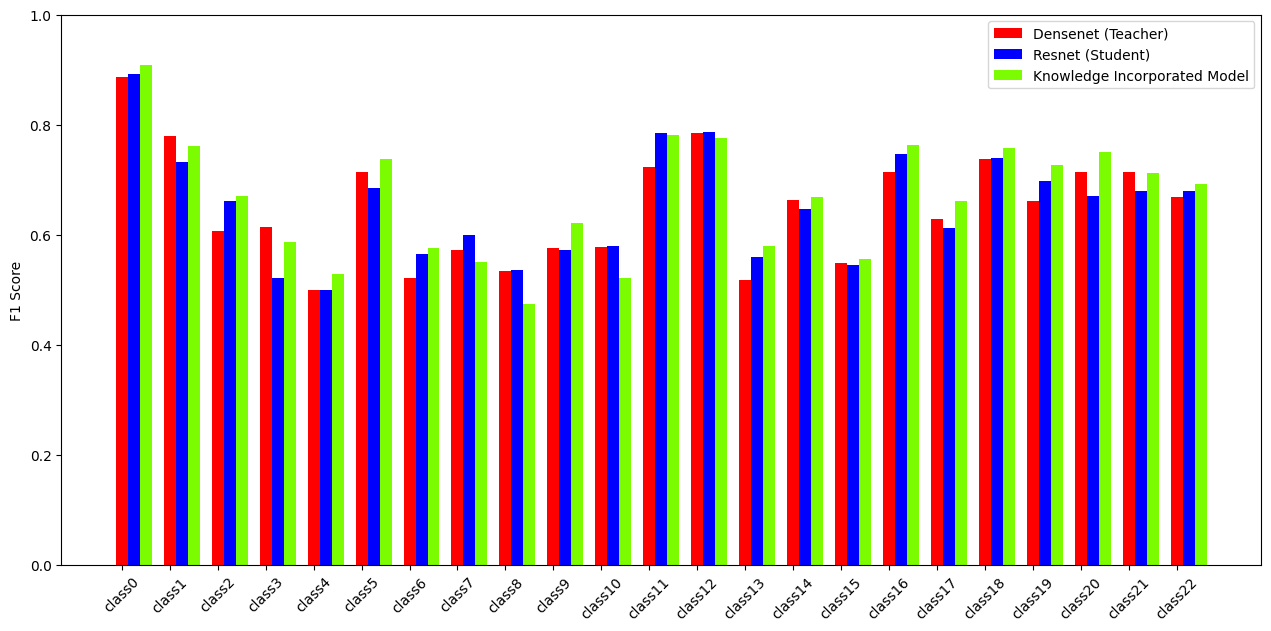

In [90]:
import numpy as np
import matplotlib.pyplot as plt
data = [[0.886228,0.779783,0.606061,0.613861,0.5,0.714286,0.521008,0.571429,0.533981,0.57508,0.577778,0.723214,0.783784,0.517241,
0.663058,0.547368,0.714286,0.627329,0.737357,0.660377,0.713725,0.713568,0.667961],
[0.892691,0.73224,0.661088,0.520833,0.5,0.684654,0.56383,0.59854,0.536364,0.571429,0.578947,0.78481,0.787072,0.558824,0.645691,0.543779,
0.746627,0.612378,0.738854,0.698113,0.669202,0.679245,0.679245],
[0.909091,0.761733,0.669323,0.587156,0.528,0.738095,0.575758,0.549618,0.474227,0.621429,0.521073,0.780702,0.776238,
0.578947,0.667626,0.555556,0.762737,0.660256,0.756598,0.727273,0.75,0.712195,0.692443]]

X = np.arange(23)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [12, 5.5]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([0, 1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25, label = "Densenet (Teacher)")
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, label = "Resnet (Student)")
ax.bar(X + 0.5, data[2], color = 'lawngreen', width = 0.25, label = "Knowledge Incorporated Model")
ax.axes.xaxis.set_ticklabels([])
labels = ['class0', 'class1' ,'class2' ,'class3' ,'class4','class5','class6','class7','class8' ,'class9' ,'class10' ,'class11', 'class12','class13', 'class14' ,'class15', 'class16','class17' ,'class18' ,'class19' ,'class20', 'class21' ,'class22']
#plt.xticks(X, labels)
#ax.axes.xaxis.set_ticks(align='center')
ax.set_xticks(X)
fontdict = {'horizontalalignment':'center'}
ax.set_xticklabels(labels,fontdict,rotation = 45)
#plt.tick_params(bottom=False)
#plt.xlabel('Class0 Class1 Class2 Class3 Class4 Class5 Class6 Class7 Class8 Class9 Class10 Class11 Class12 Class13 Class14 Class15 Class16 Class17 Class18 Class19 Class20 Class21 Class22')
plt.ylabel('F1 Score')
plt.legend(loc= "best")

In [41]:
[0.723214,0.783784,0.517241,
0.663058,0.547368,0.714286,0.627329,0.737357,0.660377,0.713725,0.713568,0.667961]

[0.78481,0.787072,0.558824,0.645691,0.543779,
0.746627,0.612378,0.738854,0.698113,0.669202,0.679245,0.679245]

[0.780702,0.776238,
0.578947,0.667626,0.555556,0.762737,0.660256,0.756598,0.727273,0.75,0.712195,0.692443]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
densenet = [0.892691,0.73224,0.661088,0.520833,0.5,0.684654,0.56383,0.59854,0.536364,0.571429,0.578947,0.78481,0.787072,0.558824,0.645691,0.543779,
0.746627,0.612378,0.738854,0.698113,0.669202,0.679245,0.679245]

resnet = [0.886228,0.779783,0.606061,0.613861,0.5,0.714286,0.521008,0.571429,0.533981,0.57508,0.577778,0.723214,0.783784,0.517241,
0.663058,0.547368,0.714286,0.627329,0.737357,0.660377,0.713725,0.713568,0.667961]

model = [0.909091,0.761733,0.669323,0.587156,0.528,0.738095,0.575758,0.549618,0.474227,0.621429,0.521073,0.780702,0.776238,
0.578947,0.667626,0.555556,0.762737,0.660256,0.756598,0.727273,0.75,0.712195,0.692443]
